# Carregamento dos dados

Nessa etapa, carrega-se o banco de dados do arquivo "teste_smarkio.xls".

In [1]:
import pandas as pd # Importa-se a biblioteca de manipulação e análise dados.

# Carrega-se os respectivos bancos de dados através do comando 'pd.read' e o diretório do arquivo '.xls'.

dados_Analise_ML = pd.read_excel("C:/Dataset_Desafio/teste_smarkio_lbs.xls", 'Análise_ML')
#dados_NLP # Printa-se a tabela com o conjunto de dados da guia 'NLP'.

In [2]:
dados_Analise_ML # Printa-se a tabela com o conjunto de dados da guia 'Análise_ML'.

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN
...,...,...,...,...
638,60,0.543772,revision,NaN
639,60,0.553846,revision,NaN
640,77,0.606065,revision,NaN
641,84,0.561842,revision,NaN


#### Pré-processamento da coluna 'status'

In [3]:
dados_Analise_ML = dados_Analise_ML.apply(lambda x: x.replace('approved', 1))
dados_Analise_ML = dados_Analise_ML.apply(lambda x: x.replace('revision', 0))
dados_Analise_ML 

,Pred_class,probabilidade,status,True_class
0,2,0.079892,1,0.0
1,2,0.379377,1,74.0
2,2,0.379377,1,74.0
3,2,0.420930,1,74.0
4,2,0.607437,1,NaN
...,...,...,...,...
638,60,0.543772,0,NaN
639,60,0.553846,0,NaN
640,77,0.606065,0,NaN
641,84,0.561842,0,NaN


#### Converte-se a coluna status de object para inteiro. Apesar de não surtir efeito agora, essa alteração será importante para que não ocorra erros durante a construção do classificador, dentre outros possíveis testes.

In [4]:
# Converte-se a coluna status de object para inteiro. Apesar de não surtir efeito agora, essa alteração será importante
# para que não ocorra erros durante a 
dados_Analise_ML['status'].astype(str).astype(int) 

0      1
1      1
2      1
3      1
4      1
      ..
638    0
639    0
640    0
641    0
642    0
Name: status, Length: 643, dtype: int32

#### Balanceamento dos dados da coluna 'True_class' é realizado conforme a descrição do teste técnico, ou seja, se o valor em análise for nulo, então assume-se o valor respectivo da coluna 'Pred_class'.

In [5]:
import math

for i in range (len(dados_Analise_ML)):
    if(math.isnan(dados_Analise_ML.True_class[i]) == 1):
        dados_Analise_ML.True_class[i] = dados_Analise_ML.Pred_class[i]
    i+=1
print(dados_Analise_ML)

     Pred_class  probabilidade  status  True_class
0             2       0.079892       1         0.0
1             2       0.379377       1        74.0
2             2       0.379377       1        74.0
3             2       0.420930       1        74.0
4             2       0.607437       1         2.0
..          ...            ...     ...         ...
638          60       0.543772       0        60.0
639          60       0.553846       0        60.0
640          77       0.606065       0        77.0
641          84       0.561842       0        84.0
642          96       0.340740       0        96.0

[643 rows x 4 columns]


<ipython-input-5-7cdf73200ca7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_Analise_ML.True_class[i] = dados_Analise_ML.Pred_class[i]


## Atividade 1: Análise exploratória dos dados utilizando estatística descritiva e inferencial, considerando uma, duas e/ou mais variáveis.


Através do comando '.info' observa-se que a coluna 'True_Class' não está balanceada em relação as demais, entretanto, conforme a descrição do teste, para os valores nulos da coluna 'True_Class' considera-se os seus respectivos valores contido na coluna 'Pred_class'. 

#### Sumário do dataset

In [6]:
dados_Analise_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    int64  
 3   True_class     643 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 20.2 KB


#### Descrição do dataset

In [7]:
dados_Analise_ML.describe() # Imprime mais informações sobre o dataset como minimo, máximo, tamanho, média.

,Pred_class,probabilidade,status,True_class
count,643.000000,643.000000,643.000000,643.000000
mean,52.712286,0.622436,0.933126,48.251944
std,37.602068,0.266811,0.249998,38.542269
min,2.000000,0.043858,0.000000,0.000000
25%,12.000000,0.408017,1.000000,3.000000
50%,59.000000,0.616809,1.000000,55.000000
75%,81.000000,0.870083,1.000000,77.000000
max,118.000000,1.000000,1.000000,118.000000


#### Qual a porcentagem de status 'approved' no conjunto de dados?

In [8]:
dados_Analise_ML.groupby(['status']).status.count()

status
0     43
1    600
Name: status, dtype: int64

Ou seja, $93.3\%$ dos status das classes é dito 'approved'.

####  De forma geral, qual o status das classes preditivas do conjunto de dados?

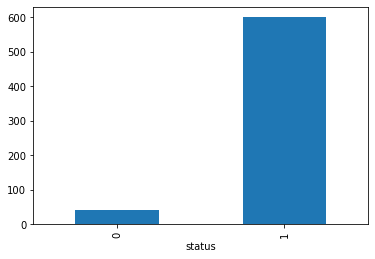

In [9]:
dados_Analise_ML.groupby(['status']).status.count().sort_values().plot(kind='bar')
# Plota-se o gráfico de barra do atributo status do dataset.

#### Quais as maiores classes preditivas do nosso conjunto de dados?

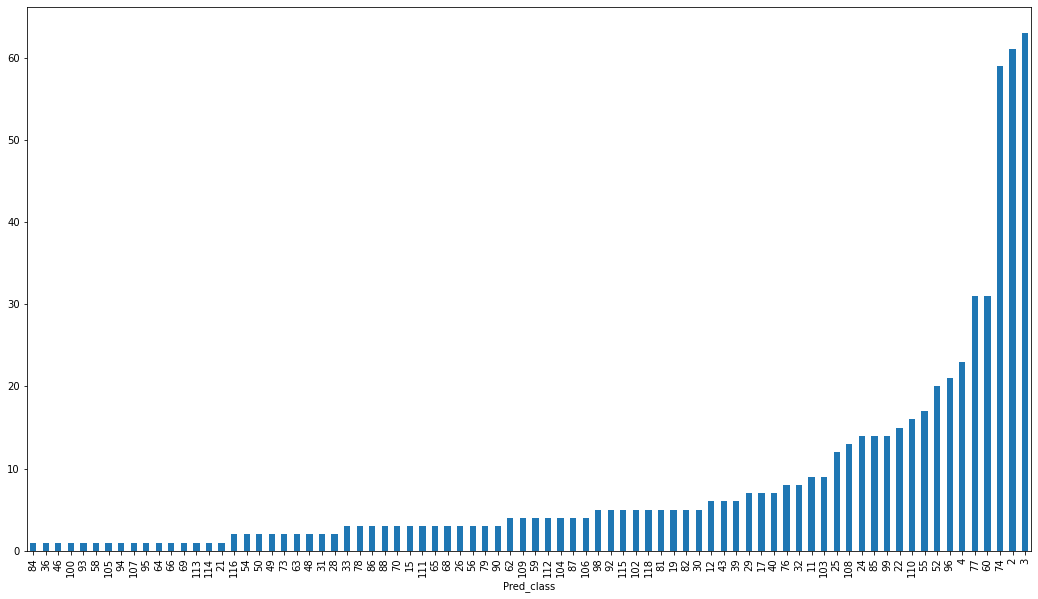

In [10]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(18,10))
dados_Analise_ML.groupby(['Pred_class']).Pred_class.count().sort_values().plot(kind='bar')

#### De acordo com a figura anterior, qual o status das duas maiores classes preditivas do conjunto de dados?

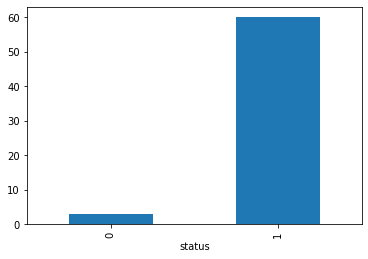

In [11]:
classe3 = dados_Analise_ML[dados_Analise_ML[u'Pred_class']==3]
classe3.groupby(['status']).status.count().sort_values().plot(kind='bar')

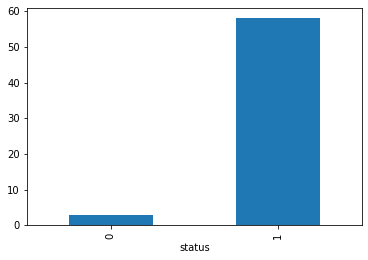

In [12]:
classe2 = dados_Analise_ML[dados_Analise_ML[u'Pred_class']==2]
classe2.groupby(['status']).status.count().sort_values().plot(kind='bar')

## Atividade 2: Crie um classificador que tenha como output se os dados com status igual a revision estão corretos ou não (Sugestão : Técnica de cross-validation K-fold);

#### Define-se um vetor 'acertos' que guardará '1' e '0' como forma de indicar se o status está correto ou não.

In [13]:
import numpy as np

acertos = np.zeros(len(dados_Analise_ML))

for i in range (len(dados_Analise_ML)):
    if(dados_Analise_ML.True_class[i] == dados_Analise_ML.Pred_class[i]):
        acertos[i] = 1
    i+=1

dados_Analise_ML['acertos'] = acertos
dados_Analise_ML

,Pred_class,probabilidade,status,True_class,acertos
0,2,0.079892,1,0.0,0.0
1,2,0.379377,1,74.0,0.0
2,2,0.379377,1,74.0,0.0
3,2,0.420930,1,74.0,0.0
4,2,0.607437,1,2.0,1.0
...,...,...,...,...,...
638,60,0.543772,0,60.0,1.0
639,60,0.553846,0,60.0,1.0
640,77,0.606065,0,77.0,1.0
641,84,0.561842,0,84.0,1.0


#### Como seria o classificador a partir dos dados presentes nas colunas 'status', 'acertos' e 'probabilidade'?.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc

aux = dados_Analise_ML.query('status == 1')
x = aux['True_class'].values # Conjunto treino
y = aux['acertos'].values  # Conjunto treino
z = aux['probabilidade'].values  # Conjunto treino

aux.loc['True_class'] = aux['True_class'].astype('category')
modelo = smf.glm(formula='acertos ~ True_class + probabilidade', data=aux, family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                acertos   No. Observations:                  600
Model:                            GLM   Df Residuals:                      597
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -288.64
Date:                Thu, 18 Feb 2021   Deviance:                       577.29
Time:                        21:14:15   Pearson chi2:                     604.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.2016      0.293     -7.512

C:\Users\Danilo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Com a posse do modelo (mostrado abaixo), agora é possível determinar qual é a probabilidade (que será utilizada como uma "zona de corte") do modelo e, por fim, determinar outra probabilidade: a porcentagem dos dados com o status 'revision' que o modelo acertou.

$$P(X_i) = \frac{e^{-2.2016+0.0098True_{}class+4.4785probabilidade}}{1+e^{-2.2016+0.0098True_{}class+4.4785probabilidade}}$$

## Atividade 3 + Atividade 4: Calcule o desempenho do modelo de classificação utilizando pelo menos três métricas e compare as três métricas de avaliação aplicadas ao modelo e descreva sobre a diferença;

#### Anteriormente, encontramos dois modelos possíveis, a priori, ambos os modelos poderiam ser utilizados para a tarefa de classificação. Nessa etapa, trabalharemos como medir a acurácia do modelo em questão.

### a) P-value: Essa medida foi obtida no modelo gerado no modelo da atividade 2. Em resumo, obteve-se um valor tão próximo de 0 a ponto dos cálculos feito internamente no computador terem considerado como 0. Esse valor nos diz que por ele ser inferior a 0.05, então pode-se afirmar que o modelo tem um intervalo de 95% de confiança.

## Atividade 5: Crie um classificador, a partir da segunda aba - NLP do arquivo de dados, que permita identificar qual trecho de música corresponde às respectivas artistas listadas (Sugestão: Naive Bayes Classifier).

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

dados_NLP = pd.read_excel("C:/Dataset_Desafio/teste_smarkio_lbs.xls", 'NLP') 
dados_NLP.head(10) # Imprime as primeiras 10 linhas do dataset

,letra,artista
0,Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...,Beyoncé
1,Your challengers are a young group from Housto...,Beyoncé
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé
3,If I ain't got nothing I got you If I ain't go...,Beyoncé
4,Six inch heels She walked in the club like nob...,Beyoncé
5,(hello) hello How are you (oh) I just got to s...,Beyoncé
6,"Shoulders sideways, smack it, smack it in the ...",Beyoncé
7,"Clap, clap, clap like you don't care Ooh we b...",Beyoncé
8,"Shoulders sideways, smack it, smack it in the ...",Beyoncé
9,Do you think You could fall for a woman like m...,Beyoncé


#### Qual a dimensão do dataset?

In [16]:
dados_NLP.shape

(518, 2)

#### Quantas letras cada artista possui no dataset?

In [17]:
dados_NLP['artista'].value_counts()

Beyoncé    274
Rihanna    244
Name: artista, dtype: int64

In [19]:
dados_NLP['letra'].replace('', np.nan, inplace=True)

In [20]:
dados_NLP = dados_NLP[['letra','artista']]
dados_NLP .artista.unique()

array(['Beyoncé', 'Rihanna'], dtype=object)

#### Cria-se um id para identificar cada artista

In [21]:
dados_NLP['id_letra']=dados_NLP.artista.map({'Beyoncé':1,'Rihanna':0})
dados_NLP


,letra,artista,id_letra
0,Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...,Beyoncé,1
1,Your challengers are a young group from Housto...,Beyoncé,1
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé,1
3,If I ain't got nothing I got you If I ain't go...,Beyoncé,1
4,Six inch heels She walked in the club like nob...,Beyoncé,1
...,...,...,...
513,Yeah yeah Yeah yeah I ain't trying to think a...,Rihanna,0
514,You the one that I dream about all day You the...,Rihanna,0
515,"No, no, no You don't love me and I know now No...",Rihanna,0
516,"You should be mine Oh baby, oh baby, oh baby, ...",Rihanna,0


#### Define-se o conjunto de treino e teste

In [22]:
x_treino, x_teste, y_treino, y_teste = train_test_split(dados_NLP.letra, dados_NLP.id_letra, random_state=0)

vect = CountVectorizer(ngram_range=(2,2))

X_treino = vect.fit_transform(x_treino)

X_teste = vect.transform(x_teste)


In [23]:
classificador = MultinomialNB(alpha =0.2)
classificador.fit(X_treino,y_treino)

resultado = classificador.predict(X_teste)
print(resultado)

[1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1
 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0]


In [24]:
accuracy_score(resultado,y_teste) # Acurácia do modelo

0.7461538461538462

#### Possível melhoria futura: Tendo em vista que o modelo está pronto, uma funcionalidade de testar trechos de música para identificar se eram da artista Beyoncé ou Rihanna poderia ser adicionada.